In [49]:
import warnings
warnings.filterwarnings('ignore')


In [53]:
import pandas as pd
data = pd.read_csv("tested.csv")

Importing panda library and reading the CSV File

In [16]:
def clean(data):
    # Columns to drop
    columns_to_drop = ["Ticket", "Cabin", "Name", "PassengerId"]
    
    # Drop columns only if they exist in the dataframe
    for col in columns_to_drop:
        if col in data.columns:
            data.drop(col, axis=1, inplace=True)

    # Fill missing values
    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        if col in data.columns:  # Ensure the column exists before filling NA
            data[col].fillna(data[col].median(), inplace=True)

    # Assuming 'Embarked' column exists, you can add a check similar to above if unsure
    data.Embarked.fillna("U", inplace=True)
    
    return data
data = clean(data)

Here we start by cleaning the data as the data has some inputs that we will not be able to process like alphabetical values and missing values

In [18]:
data.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


The sex being in alphabetical values needs to be changed to be able to process in the model

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

cols = ["Sex", "Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])
    print (le.classes_)

data.head(5)

['female' 'male']
['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


Using the sklearn's preprocessing library we were able to change the sex into numerical values Male:1, Female:0 and embarqed values C:3 , Q:1 , S:2

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X = data.drop(columns="Survived")
y = data["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Here using logistic regression we are training our model on the on the data

In [55]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

ValueError: could not convert string to float: '10-50'

In [31]:
y_pred = model.predict(x_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(classification_report(y_val, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



The Accuracy here shows that the data might be Overfitting hence we will try to look for the problem in the next part to find out if the data is accurate or not

In [52]:
# 1. Function to get passenger details from user
def get_passenger_details():
    # Prompt user for passenger details
    print("Enter the passenger details:")

    pclass = int(input("Pclass (1/2/3): "))
    sex = input("Sex (male/female): ")
    age = float(input("Age: "))
    sibsp = int(input("Number of siblings/spouses aboard: "))
    parch = int(input("Number of parents/children aboard: "))
    fare = float(input("Fare: "))
    embarked = input("Embarked (C/Q/S/U): ")

    passenger = {
        'Pclass': [pclass],
        'Sex': [sex],
        'Age': [age],
        'SibSp': [sibsp],
        'Parch': [parch],
        'Fare': [fare],
        'Embarked': [embarked]
    }

    return passenger

# 2. Function to prepare the user input data
def prepare_data(passenger):
    df_new = pd.DataFrame(passenger)

    # Use the label encoder (le) for "Sex" and "Embarked" columns
    # Ideally, save the encoder's state for each column after training to ensure consistent encoding
    for col in ["Sex", "Embarked"]:
        df_new[col] = le.fit_transform(df_new[col])
    
    # Ensure the new data has the same columns as the training data
    for col in X.columns:
        if col not in df_new.columns:
            df_new[col] = 0  # Add missing columns with default value
    
    return df_new

# 3. Predict using the trained model
def predict_survival(data, model):
    prediction = model.predict_proba(data)
    # Assuming the positive class (Survived) is the second class
    return prediction[0][1]  # Return the survival probability

# Train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Get passenger details from the user
passenger = get_passenger_details()

# Prepare data for prediction
df_new = prepare_data(passenger)

# Predict using trained model
survival_chance = predict_survival(df_new, model)

print(f"The predicted survival probability of the passenger is: {survival_chance:.2f}")


Enter the passenger details:
The predicted survival probability of the passenger is: 0.96


The model giving a survival probability of 0.96 and the accuracy being 1.00 shows that there might be some OverFitting or Data Leakage in the model because we have not seperated the test and training data given that i was only provided with the test data

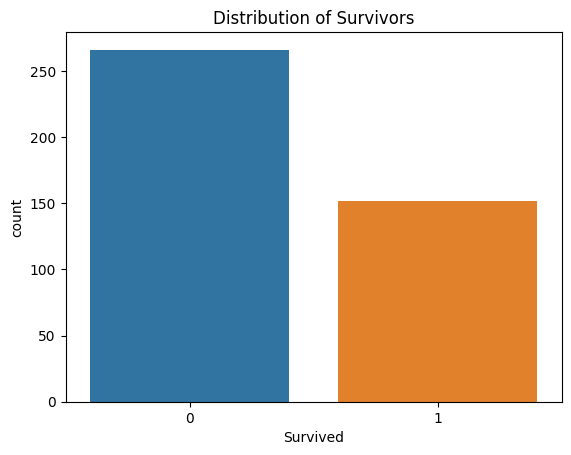

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=data, x='Survived')
plt.title('Distribution of Survivors')
plt.show()

0 being didn't survive and 1 being survived

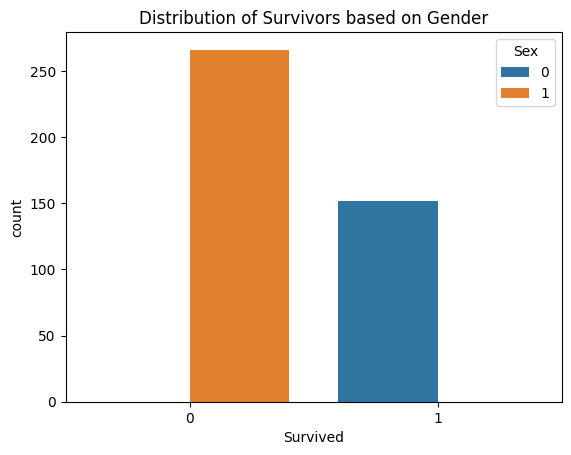

In [33]:
sns.countplot(data=data, x='Survived', hue='Sex')
plt.title('Distribution of Survivors based on Gender')
plt.show()


Here in the distribution we can see that the males in comparison to females had a lesser chance of survival on the titanic

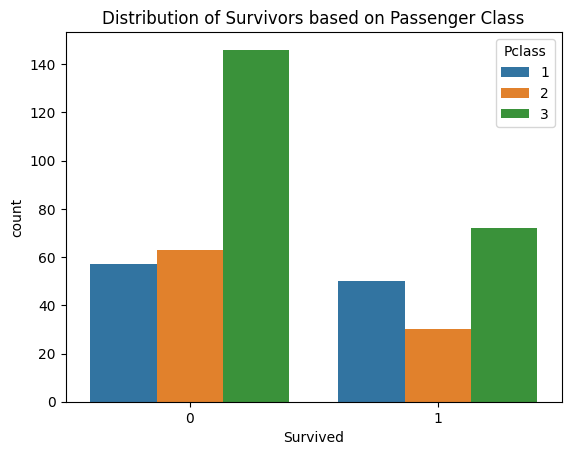

In [34]:
sns.countplot(data=data, x='Survived', hue='Pclass')
plt.title('Distribution of Survivors based on Passenger Class')
plt.show()


Through this graph we can determine that the highest number of dying passengers belonged to the 3rd passenger class, where as the highest surviving number also belonged to the 3rd passenger class 

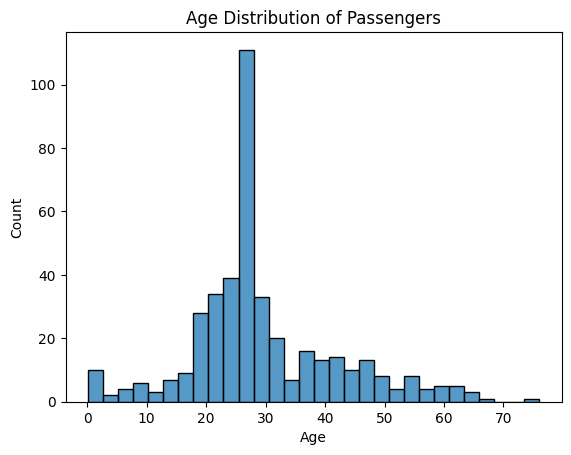

In [35]:
sns.histplot(data['Age'].dropna(), bins=30)
plt.title('Age Distribution of Passengers')
plt.show()


Here we have an age distribution of passengers noticing that people in the age group of 25-29 compromised most of the passengers

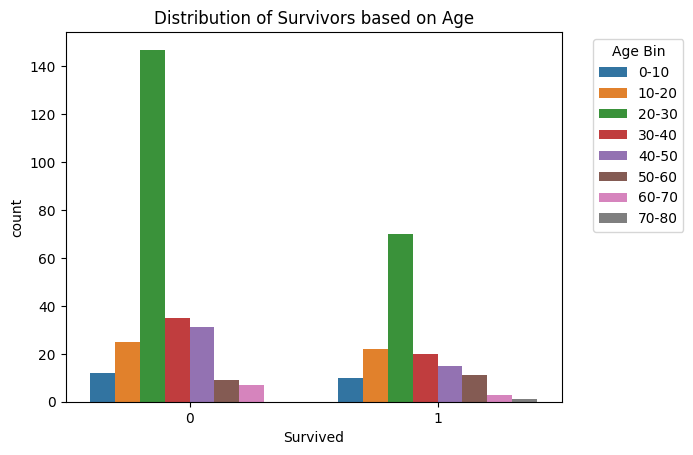

In [41]:
# Create age bins
data['Age_bin'] = pd.cut(data['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Now plot
sns.countplot(data=data, x='Survived', hue='Age_bin')
plt.title('Distribution of Survivors based on Age')
plt.legend(title='Age Bin', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.show()


Here we have binned the age group into 10's and looking at the graph the survival ratio of the people between 20-30 was the highest and then those between 10-20, whereas the highest death ratio belonged to the age group 20-30 also and then 30-40

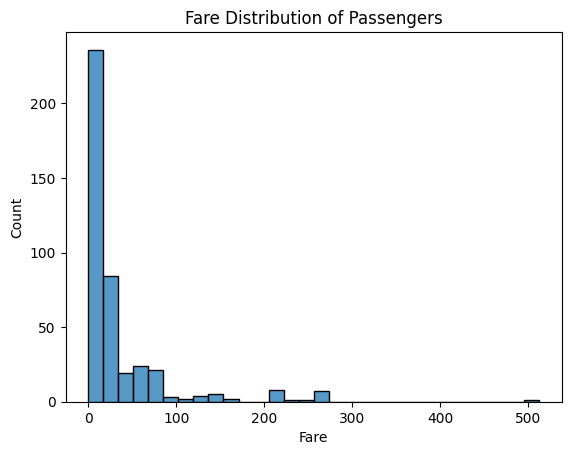

In [37]:
sns.histplot(data['Fare'], bins=30)
plt.title('Fare Distribution of Passengers')
plt.show()


Here we can see the Fare distribution of passengers noticing that most of the passengers were not financially well of, as the ship mostly consisted of passengers paying 10-30 dollars for the trip

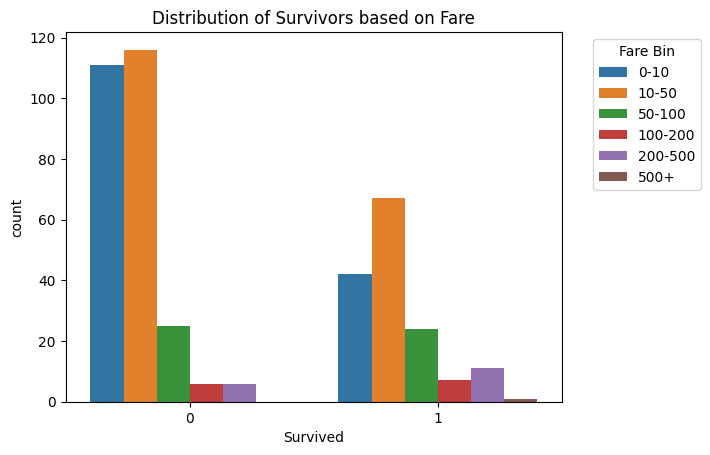

In [40]:
# Create fare bins
data['Fare_bin'] = pd.cut(data['Fare'], bins=[0, 10, 50, 100, 200, 500, 1000], labels=['0-10', '10-50', '50-100', '100-200', '200-500', '500+'])

# Now plot
sns.countplot(data=data, x='Survived', hue='Fare_bin')
plt.title('Distribution of Survivors based on Fare')
plt.legend(title='Fare Bin', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.show()
